In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
import numpy as np
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from google.colab import files

In [4]:
plt.rcParams.update({'font.serif':'Times New Roman'})

In [ ]:
print(mpl.matplotlib_fname())
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = 'Arial'

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
uploaded = files.upload()#upload csv files

Saving TestDataSheet.csv to TestDataSheet.csv


In [ ]:
#Take the required Features into the input matrix X and target matrix y

R = np.genfromtxt('TestDataSheet.csv', delimiter=',')
X=R[1:,[0,1,2,3,4,5,9,13,14]][:]
y=R[1:,[6,7,8]][:]
X_names=['P (W)', 'v (mm/min)', 'm. (g/min)', 'Density (kg/m3)',
       'Conductivity (W/m K)', 'Sp Heat (J/kg K)', 'Spot Size Diameter(mm)',
       'Sub. Density (kg/m3)', 'Sub. Conductivity (W/m K)',
       'Sub. Sp Heat (J/kg K)', 'Diffusivity', 'Sub. Diffusivity']

In [ ]:
#Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3
)

In [ ]:
#Parameter optimization using GridSearchCV
reg = GradientBoostingRegressor()
model = MultiOutputRegressor(estimator=reg)
params = {
    "estimator__n_estimators":[5,50,250,500],
    "estimator__max_depth":[1,3,5,7,9],
    "estimator__learning_rate":[0.001,0.01,0.1],
    "estimator__loss": ["squared_error"],
    "estimator__min_samples_split": [5]
}

cv = GridSearchCV(model,params,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor()),
             param_grid={'estimator__learning_rate': [0.001, 0.01, 0.1],
                         'estimator__loss': ['squared_error'],
                         'estimator__max_depth': [1, 3, 5, 7, 9],
                         'estimator__min_samples_split': [5],
                         'estimator__n_estimators': [5, 50, 250, 500]})

In [ ]:
#Use the best estimator from optimized models as a predictor
finalmodel=cv.best_estimator_
y_pred=finalmodel.predict(X_test)

#Get RMSE and R2 values
msew=mean_squared_error(y_test[:,0], y_pred[:,0],squared=False)
msed=mean_squared_error(y_test[:,1], y_pred[:,1],squared=False)
mseh=mean_squared_error(y_test[:,2], y_pred[:,2],squared=False)
rscorew = r2_score(y_test[:,0], y_pred[:,0])
rscored = r2_score(y_test[:,1], y_pred[:,1])
rscoreh = r2_score(y_test[:,2], y_pred[:,2])

print("The root mean squared error for the width on test set: {:.4f}".format(msew))
print("The root mean squared error for the depth on test set: {:.4f}".format(msed))
print("The root mean squared error for the height on test set: {:.4f}".format(mseh))
print("The r2 score for the width on test set: {:.4f}".format(rscorew))
print("The r2 score for the depth on test set: {:.4f}".format(rscored))
print("The r2 score for the height on test set: {:.4f}".format(rscoreh))

The root mean squared error for the width on test set: 0.4117
The root mean squared error for the depth on test set: 0.2191
The root mean squared error for the height on test set: 0.1384
The r2 score for the width on test set: 0.9783
The r2 score for the depth on test set: 0.9347
The r2 score for the height on test set: 0.9349


The parameters of the line: [ 1.0156404  -0.04525875]


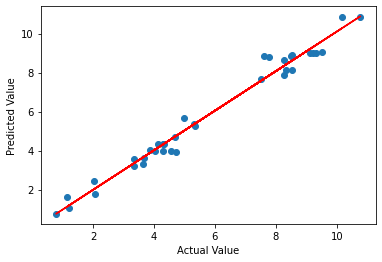

The parameters of the line: [0.9495541  0.10861009]


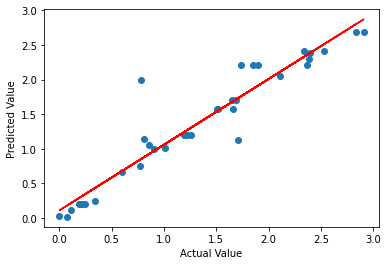

The parameters of the line: [0.96384748 0.06780086]


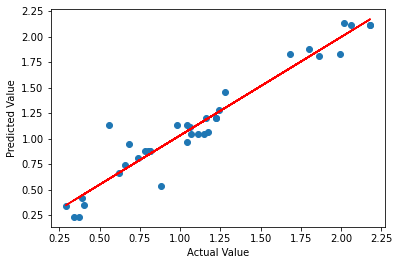

In [ ]:
#Obtain Optimized vs Actual polyfit Plots
for i in range(3):
  theta = np.polyfit(y_test[:,i], y_pred[:,i], 1)

  print(f'The parameters of the line: {theta}')

  # Now, calculating the y-axis values against x-values according to
  # the parameters theta0, theta1 and theta2
  y_line = theta[1] + theta[0] * y_test[:,i]

  # Plotting the data points and the best fit line
  plt.scatter(y_test[:,i],y_pred[:,i])
  plt.plot(y_test[:,i], y_line, 'r')
  plt.xlabel('Actual Value')
  plt.ylabel('Predicted Value')

  plt.show()

In [ ]:
uploaded = files.upload()#upload csv files

Saving values.csv to values.csv


The parameters of the line: [ 1.8253943 -0.2673078]


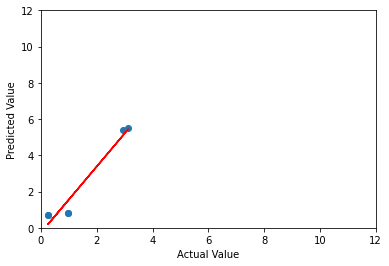

The parameters of the line: [0.7988253  0.45444482]


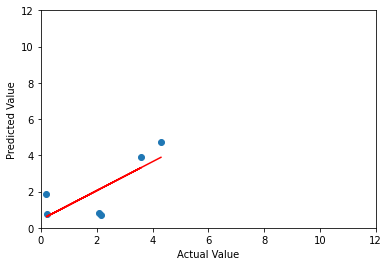

The parameters of the line: [18.70627538 -6.15720369]


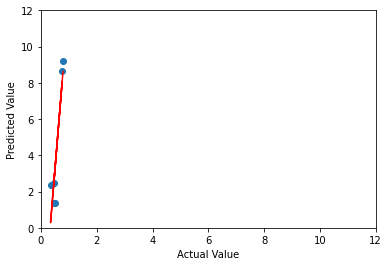

In [ ]:
#Obtain Optimized vs Actual polyfit Plots
S = np.genfromtxt('values.csv', delimiter=',')
y_test = S[:][0:3];
y_pred = S[:][3:6];

for i in range(3):
  theta = np.polyfit(y_test[i,:], y_pred[i,:], 1)

  print(f'The parameters of the line: {theta}')

  # Now, calculating the y-axis values against x-values according to
  # the parameters theta0, theta1 and theta2
  y_line = theta[1] + theta[0] * y_test[i,:]

  # Plotting the data points and the best fit line
  plt.scatter(y_test[i,:],y_pred[i,:])
  plt.plot(y_test[i,:], y_line, 'r')
  plt.xlim([0, 12])
  plt.ylim([0, 12])
  plt.xlabel('Actual Value')
  plt.ylabel('Predicted Value')

  plt.show()
  

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


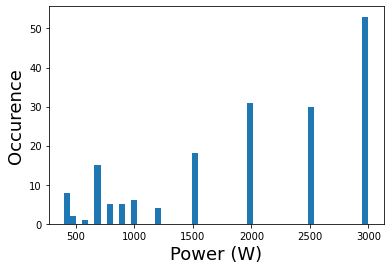

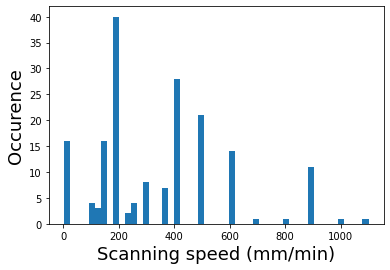

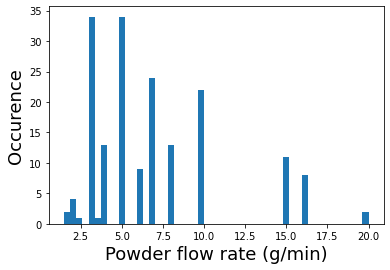

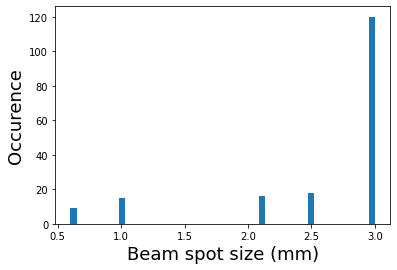

In [ ]:
plt.hist(X[:,[0]][:],50)
plt.xlabel("Power (W)",fontname="sans-serif", fontsize=18)
plt.ylabel("Occurence",fontname="sans-serif", fontsize=18)
plt.show()

plt.hist(X[:,[1]][:],50)
plt.xlabel("Scanning speed (mm/min)",fontname="sans-serif", fontsize=18)
plt.ylabel("Occurence",fontname="sans-serif", fontsize=18)
plt.show()

plt.hist(X[:,[2]][:],50)
plt.xlabel("Powder flow rate (g/min)",fontname="sans-serif", fontsize=18)
plt.ylabel("Occurence",fontname="sans-serif", fontsize=18)
plt.show()

plt.hist(X[:,[6]][:],50)
plt.xlabel("Beam spot size (mm)",fontname="sans-serif", fontsize=18)
plt.ylabel("Occurence",fontname="sans-serif", fontsize=18)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


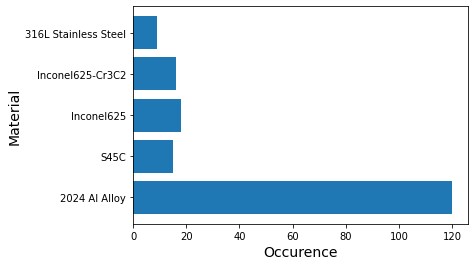

In [ ]:
plt.barh(["2024 Al Alloy","S45C","Inconel625","Inconel625-Cr3C2","316L Stainless Steel"],[120,15,18,16,9])
plt.xlabel("Occurence",fontname="sans-serif", fontsize=14)
plt.ylabel("Material",fontname="sans-serif", fontsize=14)
plt.show()